# Machine Learning Exercise 1 - Linear Regression

Josemar Figueiredo Pereira

In [931]:
## Linear regression with one variable

In [932]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [933]:
data = pd.read_csv('ex1data1.txt', header=None, names=['Population', 'Profit']) # pandas dataframe
data.head()

Population   Profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233

In [934]:
data.describe()

Population     Profit
count   97.000000  97.000000
mean     8.159800   5.839135
std      3.869884   5.510262
min      5.026900  -2.680700
25%      5.707700   1.986900
50%      6.589400   4.562300
75%      8.578100   7.046700
max     22.203000  24.147000

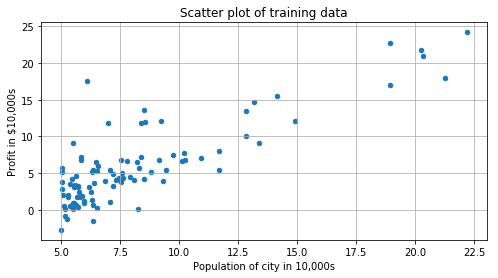

In [935]:
fig = plt.figure()
ax = data.plot(kind='scatter', x='Population', y='Profit', title='Scatter plot of training data', 
               figsize=(8, 4), grid=True)
ax.set_xlabel('Population of city in 10,000s')
ax.set_ylabel('Profit in $10,000s')
fig.savefig('01_single_scatter.png')

## Gradient Descent

First, you create a function to compute the cost of a given solution (characterized by the parameters beta):

In [936]:
def compute_cost(X, y, beta):
    m = X.shape[0]
    h = X * beta.transpose()
    return (0.5/m)*np.sum(np.power(h - y, 2))
    # m = y.size
    # h = X.dot(beta.T)
    # return (0.5 * m)*h.T.dot(h)

We store each example as a row in the X matrix. To take into account the intercept term (\beta0), we add an additional first column to X and set it to all ones. This allows us to treat \beta0 as simply another 'feature'.

In [937]:
data.insert(0, 'beta zero', 1)

Now let's do some variable initialization

In [938]:
def prepare_to_evaluate(data):
    cols = data.shape[1]
    X = data.iloc[:, 0:cols-1]
    y = data.iloc[:, cols-1:cols]  # the house value must not be normalized
    X = np.matrix(X.values)
    y = np.matrix(y.values)
    return X, y

In [939]:
# set X (training data) and y (target variable)
X, y = prepare_to_evaluate(data)

Now, you need to guarantee that X (training set) and y (target variable) are correct.

In [940]:
X[0:5,:]

matrix([[ 1.    ,  6.1101],
        [ 1.    ,  5.5277],
        [ 1.    ,  8.5186],
        [ 1.    ,  7.0032],
        [ 1.    ,  5.8598]])

In [941]:
y[0:5,:]

matrix([[ 17.592 ],
        [  9.1302],
        [ 13.662 ],
        [ 11.854 ],
        [  6.8233]])

The cost function is expecting numpy matrices so we need to convert X and y before we can use them. We also need to initialize beta.

In [942]:
def generate_beta(X):
    return np.matrix(np.zeros([1, X.shape[1]]))

Here's what beta looks like.

In [943]:
beta = generate_beta(X)
beta

matrix([[ 0.,  0.]])

Let's take a quick look at the shape of our matrices.

In [944]:
X.shape, beta.shape, y.shape

((97, 2), (1, 2), (97, 1))

Now let's compute the cost for our initial solution (0 values for beta).

In [945]:
compute_cost(X, y, beta)

32.072733877455676

Now, you are asked to define a function to perform gradient descent on the parameters beta

In [946]:
def gradient_descent(X, y, theta, alpha, iters):
    '''
    alpha: learning rate
    iters: number of iterations
    OUTPUT:
    theta: learned parameters
    cost:  a vector with the cost at each training iteration
    '''
    
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    temp = np.matrix(np.zeros(theta.shape))
        
    for i in range(iters):
        h = X * theta.transpose()        
        n = X.shape[0]        
        for j in range(parameters):
            temp[:, j] = (h - y).transpose() * X[:, j]
        theta -= alpha * temp / n
        cost[i] = compute_cost(X, y, theta)        
        
    return theta, cost

Initialize some additional variables - the learning rate alpha, and the number of iterations to perform

In [947]:
alpha = 0.01
iters = 1500

Now let's run the gradient descent algorithm to fit our parameters theta to the training set.

In [948]:
g, cost = gradient_descent(X[0,:], y[0], beta, alpha, iters)

In [949]:
g

matrix([[ 0.45892187,  2.80405855]])

In [950]:
g, cost = gradient_descent(X, y, beta, alpha, iters)
g

matrix([[-3.61857447,  1.16518525]])

Finally we can compute the cost (error) of the trained model using our fitted parameters.

In [951]:
compute_cost(X, y, g)

4.4839671532797301

Now let's plot the linear model along with the data to visually see how well it fits.

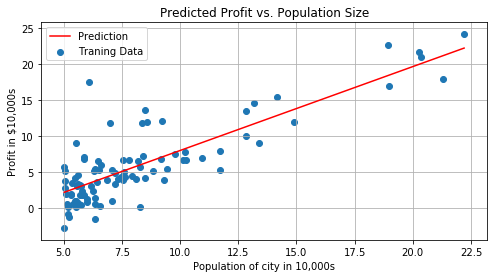

In [952]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population of city in 10,000s')
ax.set_ylabel('Profit in $10,000s')
ax.set_title('Predicted Profit vs. Population Size')
ax.grid(True)
fig.savefig('02_single_scatter_training.png')

Looks pretty good! Remember that the gradient decent function also outputs a vector with the cost at each training iteration, we can plot it as well. 

Since the cost always decreases - this is an example of a convex optimization problem.

In [953]:
def plot_cost_error(iters, cost):
    fig, ax = plt.subplots(figsize=(8,4))
    ax.plot(np.arange(iters), cost, 'r')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    ax.set_title('Error vs. Training Epoch')
    ax.grid(True)
    return fig, ax

In [954]:
fig, ax = plot_cost_error(iters, cost)
fig.savefig('03_single_error_training.png')

Now, we will show a contour plot that presents beta0 against beta1 and the outcome of J. First, we set values for beta0 and beta1

In [955]:
beta0_vals = np.linspace(-10, 10, 100)
beta1_vals = np.linspace(-1, 4, 100)

Now, initialize J values to a matrix of 0's

In [956]:
j_vals = np.zeros([len(beta0_vals), len(beta1_vals)])

In [957]:
for i in range(len(beta0_vals)):
    for j in range(len(beta1_vals)):
        t = np.matrix(np.array([beta0_vals[i], beta1_vals[j]]))
        j_vals[i,j] = compute_cost(X, y, t)

In [961]:
plt.contour(beta0_vals, beta1_vals, j_vals.T, np.logspace(-2, 3, 20))
plt.xlabel('Beta 1')
plt.ylabel('Beta 2')
plt.title('Beta variation')
plt.savefig('04_gradient.png')

In [963]:
plt.scatter(g[0,0],g[0,1],)
plt.contour(beta0_vals, beta1_vals, j_vals.T, np.logspace(-2, 3, 20));
plt.xlabel('Beta 1')
plt.ylabel('Beta 2')
plt.title('Beta variation and mininum global')
plt.savefig('05_gradient_beta.png')

Now, in 3D

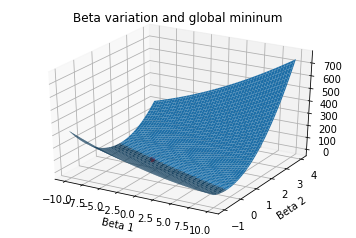

In [965]:
beta0_mesh, beta1_mesh = np.meshgrid(beta0_vals, beta1_vals)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(beta0_mesh, beta1_mesh, j_vals.T)
ax.scatter(g[0,0],g[0,1],color='r')
ax.set_xlabel('Beta 1')
ax.set_ylabel('Beta 2')
ax.set_title('Beta variation and global mininum')
fig.savefig('06_gradient_mesh.png')

## Linear regression with multiple variables

From now on, you will use the second dataset, i.e., ex1data2.txt. This is a housing price dataset with 2 variables (size of the house in square feet and number of bedrooms) and a target (price of the house). You are asked to use the techniques already applied to analyze that data set.

In [966]:
data_original = pd.read_csv('ex1data2.txt', header=None, names=['Size', 'Bedrooms', 'Price'])
data_original.head()

Size  Bedrooms   Price
0  2104         3  399900
1  1600         3  329900
2  2400         3  369000
3  1416         2  232000
4  3000         4  539900

Following the same steps now let´s visualize these data:

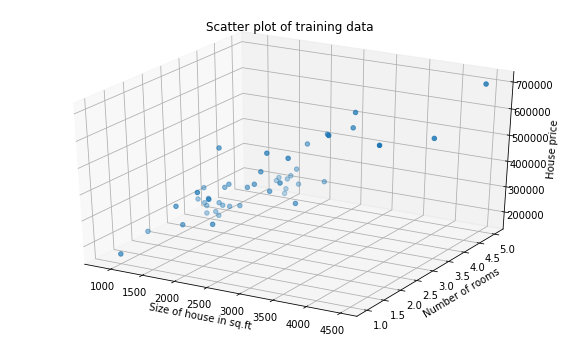

In [967]:
ax = plt.figure(figsize=(10, 6)).gca(projection='3d')
ax.scatter(data_original['Size'], data_original['Bedrooms'], data_original['Price']) 

ax.set_xlabel('Size of house in sq.ft')
ax.set_ylabel('Number of rooms')
ax.set_zlabel('House price')
ax.set_title('Scatter plot of training data')
plt.savefig('07_mult_scatter.png')

For this task we add another pre-processing step - normalizing the features.

Notice that the scale of the values for each feature is vastly large. A house will typically have 2-5 bedrooms, but may have anywhere from hundreds to thousands of square feet. If we use the features as they are in the dataset, the 'size' feature would too much wheighted and would end up dwarfing any contributions from the 'number of bedrooms' feature. To fix this, we need to do something called 'feature normalization'. That is, we need to adjust the scale of the features to level the playing field. One way to do this is by subtracting from each value in a feature the mean of that feature, and then dividing by the standard deviation.

In [968]:
def feature_normalize(data, mu = None, sigma = None):
    if data.shape[0] > 1:  # if we have only one item use informed mu and sigma 
        sigma = data.std()
        mu = data.mean()
    return (data - mu) / sigma, mu, sigma
        

In [969]:
data_normalized = data_original.copy()
# data_normalized[["Size", "Bedrooms"]], mu, sigma = feature_normalize(data_original[["Size", "Bedrooms"]])
data_normalized, mu, sigma = feature_normalize(data_original)
data_normalized.head()

Size  Bedrooms     Price
0  0.130010 -0.223675  0.475747
1 -0.504190 -0.223675 -0.084074
2  0.502476 -0.223675  0.228626
3 -0.735723 -1.537767 -0.867025
4  1.257476  1.090417  1.595389

In [970]:
print(mu)
print(sigma)

Size          2000.680851
Bedrooms         3.170213
Price       340412.659574
dtype: float64
Size           794.702354
Bedrooms         0.760982
Price       125039.899586
dtype: float64


Given that you were asked to implement both cost function and gradient descent using matrix operations, your previously implementations will work just fine in the multivariate dataset. Hence, you need now insert the 'ones' column as before and separate the X's and the y's.

Conduct the rest of this exercise by repeating the experiments conducted in the simple linear dataset...

In [971]:
data_normalized.insert(0, 'beta zero', 1)

In [972]:
train_data = data_normalized.sample(frac=0.8, random_state=200)
test_data  = data_normalized.drop(train_data.index)

In [973]:
X, y = prepare_to_evaluate(train_data)

In [974]:
print("X[0, :]: {0}".format(X[0, :]))
print("y[0]: {0}".format(y[0]))

X[0, :]: [[ 1.          0.25080981 -0.22367519]]
y[0]: [[ 1.07635515]]


In [975]:
alpha = 0.1
iters = 50
beta = generate_beta(X)

g, cost = gradient_descent(X, y, beta, alpha, iters)
g

matrix([[-0.06080434,  0.89350345, -0.02675464]])

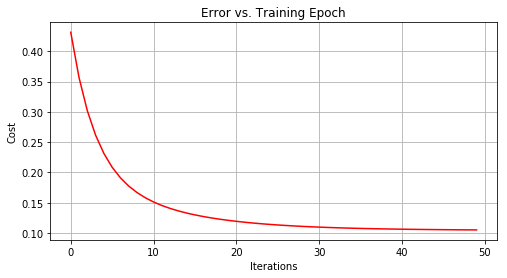

In [976]:
fig, ax = plot_cost_error(iters, cost)
fig.savefig('08_mult_error_training.png')

In [977]:
d = {'Size' : pd.Series([1650]), 'Bedrooms' : pd.Series([3]), 'Price' : pd.Series([0])}
df = pd.DataFrame(d)
df

Bedrooms  Price  Size
0         3      0  1650

In [978]:
df_norm, mu, sigma = feature_normalize(df, mu, sigma)
df_norm.insert(0, 'beta zero', 1)
df_norm

beta zero  Bedrooms     Price      Size
0          1 -0.223675 -2.722432 -0.441273

In [979]:
X, y = prepare_to_evaluate(df_norm[['beta zero', 'Size', 'Bedrooms', 'Price']])
f = X * g.transpose()
test_house = f[0, 0]

In [980]:
desnormalize(test_house, mu['Price'], sigma['Price'])

284257.3510527066

So... In the Andrew Ng course the expected result it´s a bittle different. 
It´s supposed to be $402476.75. But he normalize a single house. 
Once there is no standard deviation to a single element, so the values became questionable.

In [981]:
X, y = prepare_to_evaluate(test_data)
f = X * g.transpose()
f

matrix([[ 1.03358112],
        [-0.1792612 ],
        [-0.87859114],
        [ 0.24655386],
        [-0.7849682 ],
        [-1.06747768],
        [-0.66496945],
        [ 0.21200378],
        [ 0.54674854]])

In [982]:
def desnormalize(data, mu, sigma):
    return data*sigma + mu

In [983]:
x13 = np.linspace(test_data['Size'].min(), 
                  test_data['Size'].max(), 100)
x23 = np.linspace(test_data['Bedrooms'].min(), 
                  test_data['Bedrooms'].max(), 20)

x13v, x23v = np.meshgrid(x13, x23)

In [984]:
f2 = g[0, 0] + (g[0, 1] * x13v) + (g[0, 2] * x23v)

In [985]:
x13v.shape, x23v.shape, f2.shape

((20, 100), (20, 100), (20, 100))

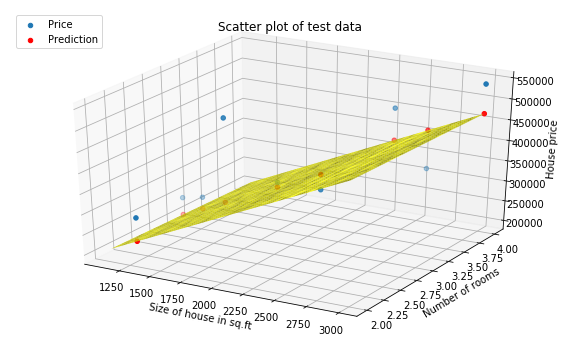

In [986]:
ax = plt.figure(figsize=(10, 6)).gca(projection='3d')
ax.scatter(desnormalize(test_data['Size'], mu['Size'], sigma['Size']), 
           desnormalize(test_data['Bedrooms'], mu['Bedrooms'], sigma['Bedrooms']), 
           desnormalize(test_data['Price'], mu['Price'], sigma['Price']), 
           label='Price') 
ax.scatter(desnormalize(test_data['Size'], mu['Size'], sigma['Size']), 
           desnormalize(test_data['Bedrooms'], mu['Bedrooms'], sigma['Bedrooms']), 
           desnormalize(np.squeeze(np.asarray(f)), mu['Price'], sigma['Price']), 
           color='red', label='Prediction') 

ax.legend(loc=2)
ax.set_xlabel('Size of house in sq.ft')
ax.set_ylabel('Number of rooms')
ax.set_zlabel('House price')
ax.set_title('Scatter plot of test data')

x13v = desnormalize(x13v, mu['Size'], sigma['Size'])
x23v = desnormalize(x23v, mu['Bedrooms'], sigma['Bedrooms'])
f2 = desnormalize(np.squeeze(np.asarray(f2)), mu['Price'], sigma['Price'])

ax.plot_surface(x13v, x23v, f2, color='yellow', label='Model')
plt.savefig('09_mult_scatter_test.png')


Now, we will show a contour plot that presents beta0 against beta1 againt beta2 and the outcome of J. First, we set values for beta0, beta1 and beta3.

In [987]:
beta0_vals = np.linspace(-3, 3, 50)
beta1_vals = np.linspace(-3, 3, 50)

In [988]:
j_vals = np.zeros([len(beta0_vals), len(beta1_vals)])

In [989]:
for i in range(len(beta0_vals)):
    for j in range(len(beta1_vals)):
        t = np.matrix([beta0_vals[i], beta1_vals[j], g[0,2]])
        j_vals[i, j] = compute_cost(X, y, t)

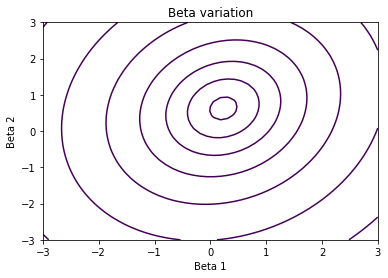

In [990]:
plt.contour(beta0_vals, beta1_vals, j_vals.T, np.logspace(-2, 3, 20));
plt.xlabel('Beta 1')
plt.ylabel('Beta 2')
plt.title('Beta variation')
plt.savefig('10_mult_grad_1.png')


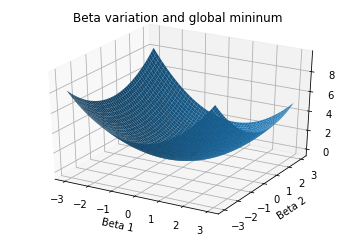

In [991]:
beta0_mesh, beta1_mesh = np.meshgrid(beta0_vals, beta1_vals)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(beta0_mesh, beta1_mesh, j_vals.T)
ax.scatter(g[0,0],g[0,1],g[0,2],color='r')
plt.xlabel('Beta 1')
plt.ylabel('Beta 2')
plt.title('Beta variation and global mininum')
fig.savefig('11_mult_mesh_1.png')

In [992]:
for i in range(len(beta0_vals)):
    for j in range(len(beta1_vals)):
        t = np.matrix([g[0,0], beta0_vals[i], beta1_vals[j]])
        j_vals[i, j] = compute_cost(X, y, t)

In [993]:
plt.contour(beta0_vals, beta1_vals, j_vals.T, np.logspace(-2, 3, 20));
plt.xlabel('Beta 2')
plt.ylabel('Beta 3')
plt.title('Beta variation')
plt.savefig('12_mult_grad_2.png')

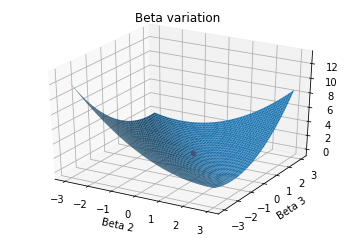

In [994]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(beta0_mesh, beta1_mesh, j_vals.T)
ax.scatter(g[0,0],g[0,1],g[0,2],color='r')
plt.xlabel('Beta 2')
plt.ylabel('Beta 3')
plt.title('Beta variation')
fig.savefig('13_mult_mesh_2.png')

In [899]:
for i in range(len(beta0_vals)):
    for j in range(len(beta1_vals)):
        t = np.matrix([beta0_vals[i], g[0,1], beta1_vals[j]])
        j_vals[i, j] = compute_cost(X, y, t)

In [995]:
plt.contour(beta0_vals, beta1_vals, j_vals.T, np.logspace(-2, 3, 20));
plt.xlabel('Beta 1')
plt.ylabel('Beta 3')
plt.title('Beta variation')
plt.savefig('14_mult_grad_3.png')

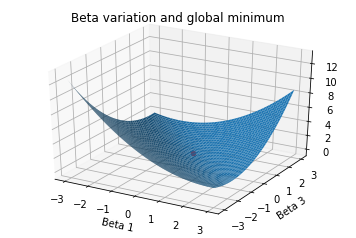

In [997]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(beta0_mesh, beta1_mesh, j_vals.T)
ax.scatter(g[0,0],g[0,1],g[0,2],color='r')
plt.xlabel('Beta 1')
plt.ylabel('Beta 3')
plt.title('Beta variation and global minimum')
fig.savefig('15_mult_mesh_3.png')

## A real world dataset

In [998]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [999]:
groupon_data = pd.read_csv('groupon-deals.csv')
groupon_data.head()

url     city  value  \
0  http://www.groupon.com/atlanta/deals/buckhead-...  Atlanta     30   
1  http://www.groupon.com/atlanta/deals/european-...  Atlanta     70   
2  http://www.groupon.com/atlanta/deals/orchard-h...  Atlanta     99   
3    http://www.groupon.com/atlanta/deals/spa-bolena  Atlanta     65   
4  http://www.groupon.com/atlanta/deals/the-stova...  Atlanta    134   

   you_save  discount_pct  num_sold  limited_quantity  sold_out tipped_at  \
0        15            50       108                 0         0  10:26:00   
1        35            50       255                 0         0   7:26:00   
2        54            55       352                 0         0   8:41:00   
3        35            54       501                 0         0   7:15:00   
4        67            50       359                 1         0   1:50:00   

   tips_with started_at weekday_start  duration  featured          category  \
0         25   1/3/2011           Mon         1         1         Nightlife   
1         10   1/3/2011           Mon         1         0     Beauty & Spas   
2         20   1/3/2011           Mon         2         0  Health & Fitness   
3         20   1/3/2011           Mon         1         0     Beauty & Spas   
4          5   1/3/2011           Mon         2         0            Travel   

   likes  
0   14.0  
1   20.0  
2   28.0  
3   27.0  
4   36.0

In [1000]:
groupon_data.shape

(16692, 16)

Now we will transform the categorical values into binary vectors.

In [1001]:
def one_hot_encoding(df, column, sufix=""):
    categories = df[column].unique()
    for x in range(len(categories)):
        df[sufix + '__' + categories[x]] = (groupon_data[column] == categories[x]) * 1  # plus one to force to be an integer
    return sufix + '__' + categories


In [1002]:
categories = one_hot_encoding(groupon_data, 'category', 'category').reshape(-1, 1).tolist()
groupon_data.head()

url     city  value  \
0  http://www.groupon.com/atlanta/deals/buckhead-...  Atlanta     30   
1  http://www.groupon.com/atlanta/deals/european-...  Atlanta     70   
2  http://www.groupon.com/atlanta/deals/orchard-h...  Atlanta     99   
3    http://www.groupon.com/atlanta/deals/spa-bolena  Atlanta     65   
4  http://www.groupon.com/atlanta/deals/the-stova...  Atlanta    134   

   you_save  discount_pct  num_sold  limited_quantity  sold_out tipped_at  \
0        15            50       108                 0         0  10:26:00   
1        35            50       255                 0         0   7:26:00   
2        54            55       352                 0         0   8:41:00   
3        35            54       501                 0         0   7:15:00   
4        67            50       359                 1         0   1:50:00   

   tips_with            ...            category__Restaurants  \
0         25            ...                                0   
1         10            ...                                0   
2         20            ...                                0   
3         20            ...                                0   
4          5            ...                                0   

  category__Arts and Entertainment  category__Other  category__Home Services  \
0                                0                0                        0   
1                                0                0                        0   
2                                0                0                        0   
3                                0                0                        0   
4                                0                0                        0   

  category__Automotive  category__Pets  category__Real Estate  \
0                    0               0                      0   
1                    0               0                      0   
2                    0               0                      0   
3                    0               0                      0   
4                    0               0                      0   

   category__Financial Services  category__Public Services & Government  \
0                             0                                       0   
1                             0                                       0   
2                             0                                       0   
3                             0                                       0   
4                             0                                       0   

   category__Legal Services  
0                         0  
1                         0  
2                         0  
3                         0  
4                         0  

[5 rows x 34 columns]

In [1003]:
weekday = one_hot_encoding(groupon_data, 'weekday_start', 'weekday_start').reshape(-1, 1).tolist()
groupon_data.head()

url     city  value  \
0  http://www.groupon.com/atlanta/deals/buckhead-...  Atlanta     30   
1  http://www.groupon.com/atlanta/deals/european-...  Atlanta     70   
2  http://www.groupon.com/atlanta/deals/orchard-h...  Atlanta     99   
3    http://www.groupon.com/atlanta/deals/spa-bolena  Atlanta     65   
4  http://www.groupon.com/atlanta/deals/the-stova...  Atlanta    134   

   you_save  discount_pct  num_sold  limited_quantity  sold_out tipped_at  \
0        15            50       108                 0         0  10:26:00   
1        35            50       255                 0         0   7:26:00   
2        54            55       352                 0         0   8:41:00   
3        35            54       501                 0         0   7:15:00   
4        67            50       359                 1         0   1:50:00   

   tips_with         ...         category__Financial Services  \
0         25         ...                                    0   
1         10         ...                                    0   
2         20         ...                                    0   
3         20         ...                                    0   
4          5         ...                                    0   

  category__Public Services & Government  category__Legal Services  \
0                                      0                         0   
1                                      0                         0   
2                                      0                         0   
3                                      0                         0   
4                                      0                         0   

   weekday_start__Mon weekday_start__Tue  weekday_start__Wed  \
0                   1                  0                   0   
1                   1                  0                   0   
2                   1                  0                   0   
3                   1                  0                   0   
4                   1                  0                   0   

   weekday_start__Thu  weekday_start__Fri  weekday_start__Sat  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   weekday_start__Sun  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  

[5 rows x 41 columns]

In [1004]:
city = one_hot_encoding(groupon_data, 'city', 'city').reshape(-1, 1).tolist()
groupon_data.head()

url     city  value  \
0  http://www.groupon.com/atlanta/deals/buckhead-...  Atlanta     30   
1  http://www.groupon.com/atlanta/deals/european-...  Atlanta     70   
2  http://www.groupon.com/atlanta/deals/orchard-h...  Atlanta     99   
3    http://www.groupon.com/atlanta/deals/spa-bolena  Atlanta     65   
4  http://www.groupon.com/atlanta/deals/the-stova...  Atlanta    134   

   you_save  discount_pct  num_sold  limited_quantity  sold_out tipped_at  \
0        15            50       108                 0         0  10:26:00   
1        35            50       255                 0         0   7:26:00   
2        54            55       352                 0         0   8:41:00   
3        35            54       501                 0         0   7:15:00   
4        67            50       359                 1         0   1:50:00   

   tips_with         ...          city__New York City city__Orlando  \
0         25         ...                            0             0   
1         10         ...                            0             0   
2         20         ...                            0             0   
3         20         ...                            0             0   
4          5         ...                            0             0   

   city__Philadelphia  city__San Diego city__San Francisco  city__San Jose  \
0                   0                0                   0               0   
1                   0                0                   0               0   
2                   0                0                   0               0   
3                   0                0                   0               0   
4                   0                0                   0               0   

   city__Seattle  city__Tallahassee  city__Vancouver  city__Washington DC  
0              0                  0                0                    0  
1              0                  0                0                    0  
2              0                  0                0                    0  
3              0                  0                0                    0  
4              0                  0                0                    0  

[5 rows x 61 columns]

In [1005]:
categories

[['category__Nightlife'],
 ['category__Beauty & Spas'],
 ['category__Health & Fitness'],
 ['category__Travel'],
 ['category__Shopping'],
 ['category__Professional Services'],
 ['category__Education'],
 ['category__Food & Drink'],
 ['category__Restaurants'],
 ['category__Arts and Entertainment'],
 ['category__Other'],
 ['category__Home Services'],
 ['category__Automotive'],
 ['category__Pets'],
 ['category__Real Estate'],
 ['category__Financial Services'],
 ['category__Public Services & Government'],
 ['category__Legal Services']]

In [1006]:
weekday

[['weekday_start__Mon'],
 ['weekday_start__Tue'],
 ['weekday_start__Wed'],
 ['weekday_start__Thu'],
 ['weekday_start__Fri'],
 ['weekday_start__Sat'],
 ['weekday_start__Sun']]

In [1007]:
city

[['city__Atlanta'],
 ['city__Boston'],
 ['city__Chicago'],
 ['city__Dallas'],
 ['city__Detroit'],
 ['city__Houston'],
 ['city__Las Vegas'],
 ['city__Los Angeles'],
 ['city__Miami'],
 ['city__New Orleans'],
 ['city__New York City'],
 ['city__Orlando'],
 ['city__Philadelphia'],
 ['city__San Diego'],
 ['city__San Francisco'],
 ['city__San Jose'],
 ['city__Seattle'],
 ['city__Tallahassee'],
 ['city__Vancouver'],
 ['city__Washington DC']]

In [1008]:
escalar_columns = ["value", "discount_pct", "duration", "you_save", "likes"]
# escalar_columns = ["discount_pct", "you_save", "value"]
categorical_columns = ["featured", "limited_quantity"]
# categorical_columns = []
categorical_columns += [x[0] for x in weekday]
categorical_columns += [x[0] for x in categories]
categorical_columns += [x[0] for x in city]

desired_columns = escalar_columns.copy()
desired_columns += [x for x in categorical_columns]
desired_columns += ["num_sold"]
desired_columns

['value',
 'discount_pct',
 'duration',
 'you_save',
 'likes',
 'featured',
 'limited_quantity',
 'weekday_start__Mon',
 'weekday_start__Tue',
 'weekday_start__Wed',
 'weekday_start__Thu',
 'weekday_start__Fri',
 'weekday_start__Sat',
 'weekday_start__Sun',
 'category__Nightlife',
 'category__Beauty & Spas',
 'category__Health & Fitness',
 'category__Travel',
 'category__Shopping',
 'category__Professional Services',
 'category__Education',
 'category__Food & Drink',
 'category__Restaurants',
 'category__Arts and Entertainment',
 'category__Other',
 'category__Home Services',
 'category__Automotive',
 'category__Pets',
 'category__Real Estate',
 'category__Financial Services',
 'category__Public Services & Government',
 'category__Legal Services',
 'city__Atlanta',
 'city__Boston',
 'city__Chicago',
 'city__Dallas',
 'city__Detroit',
 'city__Houston',
 'city__Las Vegas',
 'city__Los Angeles',
 'city__Miami',
 'city__New Orleans',
 'city__New York City',
 'city__Orlando',
 'city__Philad

In [1009]:
#  cols_names = ["city", "city_bin", "value", "discount_pct", "duration", "featured", "limited_quantity", "weekday_start", "weekday_start_bin", "category", "category_bin", "city_bin", "num_sold"]
#  cols_names = ["city_bin", "value", "discount_pct", "duration", 
#                "featured", "limited_quantity", "weekday_start_bin", "category_bin", "city_bin", "num_sold"]
#  cols_names = ["value", "discount_pct", "duration", 
#               "featured", "limited_quantity", "num_sold"]
#  cols_names = ["value", "discount_pct", "duration", "num_sold"]
groupon_data = groupon_data.dropna(axis=0)  # axis = 0 means we drop lines
groupon_data = groupon_data.loc[:, desired_columns] 
groupon_data.head()

value  discount_pct  duration  you_save  likes  featured  limited_quantity  \
0     30            50         1        15   14.0         1                 0   
1     70            50         1        35   20.0         0                 0   
2     99            55         2        54   28.0         0                 0   
3     65            54         1        35   27.0         0                 0   
4    134            50         2        67   36.0         0                 1   

   weekday_start__Mon  weekday_start__Tue  weekday_start__Wed    ...     \
0                   1                   0                   0    ...      
1                   1                   0                   0    ...      
2                   1                   0                   0    ...      
3                   1                   0                   0    ...      
4                   1                   0                   0    ...      

   city__Orlando  city__Philadelphia  city__San Diego  city__San Francisco  \
0              0                   0                0                    0   
1              0                   0                0                    0   
2              0                   0                0                    0   
3              0                   0                0                    0   
4              0                   0                0                    0   

   city__San Jose  city__Seattle  city__Tallahassee  city__Vancouver  \
0               0              0                  0                0   
1               0              0                  0                0   
2               0              0                  0                0   
3               0              0                  0                0   
4               0              0                  0                0   

   city__Washington DC  num_sold  
0                    0       108  
1                    0       255  
2                    0       352  
3                    0       501  
4                    0       359  

[5 rows x 53 columns]

In [1010]:
groupon_data.describe()

value  discount_pct      duration      you_save         likes  \
count  15875.000000  15875.000000  15875.000000  15875.000000  15875.000000   
mean     128.894677     56.156976      2.185638     80.831748     56.627402   
std      284.973228     10.027035      1.250121    185.238714    116.050186   
min        4.000000      0.000000      0.000000      0.000000      0.000000   
25%       30.000000     50.000000      1.000000     15.000000     10.000000   
50%       55.000000     51.000000      2.000000     30.000000     26.000000   
75%      127.000000     60.000000      3.000000     75.000000     60.000000   
max     6000.000000     99.000000     10.000000   4901.000000   4087.000000   

           featured  limited_quantity  weekday_start__Mon  weekday_start__Tue  \
count  15875.000000      15875.000000        15875.000000        15875.000000   
mean       0.220157          0.299402            0.182173            0.149606   
std        0.414366          0.458010            0.385999            0.356696   
min        0.000000          0.000000            0.000000            0.000000   
25%        0.000000          0.000000            0.000000            0.000000   
50%        0.000000          0.000000            0.000000            0.000000   
75%        0.000000          1.000000            0.000000            0.000000   
max        1.000000          1.000000            1.000000            1.000000   

       weekday_start__Wed      ...       city__Orlando  city__Philadelphia  \
count        15875.000000      ...        15875.000000        15875.000000   
mean             0.155213      ...            0.033449            0.045102   
std              0.362119      ...            0.179811            0.207535   
min              0.000000      ...            0.000000            0.000000   
25%              0.000000      ...            0.000000            0.000000   
50%              0.000000      ...            0.000000            0.000000   
75%              0.000000      ...            0.000000            0.000000   
max              1.000000      ...            1.000000            1.000000   

       city__San Diego  city__San Francisco  city__San Jose  city__Seattle  \
count     15875.000000         15875.000000    15875.000000   15875.000000   
mean          0.041449             0.056189        0.022110       0.055748   
std           0.199332             0.230294        0.147047       0.229442   
min           0.000000             0.000000        0.000000       0.000000   
25%           0.000000             0.000000        0.000000       0.000000   
50%           0.000000             0.000000        0.000000       0.000000   
75%           0.000000             0.000000        0.000000       0.000000   
max           1.000000             1.000000        1.000000       1.000000   

       city__Tallahassee  city__Vancouver  city__Washington DC      num_sold  
count       15875.000000     15875.000000         15875.000000  15875.000000  
mean            0.012283         0.025512             0.058583    691.466331  
std             0.110151         0.157679             0.234849   1606.329879  
min             0.000000         0.000000             0.000000      0.000000  
25%             0.000000         0.000000             0.000000    131.000000  
50%             0.000000         0.000000             0.000000    317.000000  
75%             0.000000         0.000000             0.000000    738.000000  
max             1.000000         1.000000             1.000000  75221.000000  

[8 rows x 53 columns]

In [1011]:
data_normalized = groupon_data.copy()
# data_normalized[["Size", "Bedrooms"]], mu, sigma = feature_normalize(data_original[["Size", "Bedrooms"]])
data_normalized, mu, sigma = feature_normalize(groupon_data)
data_normalized.head()

value  discount_pct  duration  you_save     likes  featured  \
0 -0.347031     -0.614038 -0.948418 -0.355389 -0.367319  1.882015   
1 -0.206667     -0.614038 -0.948418 -0.247420 -0.315617 -0.531312   
2 -0.104903     -0.115386 -0.148496 -0.144850 -0.246681 -0.531312   
3 -0.224213     -0.215116 -0.948418 -0.247420 -0.255298 -0.531312   
4  0.017915     -0.614038 -0.148496 -0.074670 -0.177746 -0.531312   

   limited_quantity  weekday_start__Mon  weekday_start__Tue  \
0         -0.653700            2.118726           -0.419422   
1         -0.653700            2.118726           -0.419422   
2         -0.653700            2.118726           -0.419422   
3         -0.653700            2.118726           -0.419422   
4          1.529656            2.118726           -0.419422   

   weekday_start__Wed    ...     city__Orlando  city__Philadelphia  \
0           -0.428624    ...         -0.186022           -0.217324   
1           -0.428624    ...         -0.186022           -0.217324   
2           -0.428624    ...         -0.186022           -0.217324   
3           -0.428624    ...         -0.186022           -0.217324   
4           -0.428624    ...         -0.186022           -0.217324   

   city__San Diego  city__San Francisco  city__San Jose  city__Seattle  \
0        -0.207938            -0.243989       -0.150362      -0.242973   
1        -0.207938            -0.243989       -0.150362      -0.242973   
2        -0.207938            -0.243989       -0.150362      -0.242973   
3        -0.207938            -0.243989       -0.150362      -0.242973   
4        -0.207938            -0.243989       -0.150362      -0.242973   

   city__Tallahassee  city__Vancouver  city__Washington DC  num_sold  
0          -0.111514        -0.161796            -0.249448 -0.363229  
1          -0.111514        -0.161796            -0.249448 -0.271716  
2          -0.111514        -0.161796            -0.249448 -0.211330  
3          -0.111514        -0.161796            -0.249448 -0.118572  
4          -0.111514        -0.161796            -0.249448 -0.206973  

[5 rows x 53 columns]

In [1012]:
data_normalized.insert(0, 'beta zero', 1)

In [1013]:
data_normalized.dropna(how='any')

beta zero     value  discount_pct  duration  you_save     likes  \
0              1 -0.347031     -0.614038 -0.948418 -0.355389 -0.367319   
1              1 -0.206667     -0.614038 -0.948418 -0.247420 -0.315617   
2              1 -0.104903     -0.115386 -0.148496 -0.144850 -0.246681   
3              1 -0.224213     -0.215116 -0.948418 -0.247420 -0.255298   
4              1  0.017915     -0.614038 -0.148496 -0.074670 -0.177746   
5              1  0.091606     -1.112689 -0.948418 -0.058475 -0.419020   
6              1  0.074061     -0.614038 -0.948418 -0.031482 -0.315617   
7              1 -0.382122     -0.614038 -0.948418 -0.382381 -0.203596   
8              1 -0.417213     -0.614038 -0.948418 -0.409373 -0.358702   
10             1  0.021424     -0.015655 -0.948418 -0.026084 -0.350085   
11             1 -0.311940     -0.115386 -0.948418 -0.317600 -0.350085   
12             1 -0.417213     -0.614038 -0.948418 -0.409373  1.735220   
13             1 -0.104903      0.582727 -0.948418 -0.107060 -0.160512   
14             1  0.109152      0.084075 -0.948418  0.054893 -0.220830   
15             1 -0.276849     -0.614038 -0.948418 -0.301404 -0.281149   
16             1  0.210916     -0.314846  0.651427  0.103479 -0.126044   
17             1 -0.382122     -0.115386  0.651427 -0.376982  0.072146   
18             1 -0.259304      0.782188  0.651427 -0.247420 -0.444871   
19             1 -0.371595     -0.813498  0.651427 -0.376982  0.683951   
20             1  0.161788      0.981648  1.451349  0.189854 -0.375936   
21             1 -0.347031     -0.614038  0.651427 -0.355389 -0.014023   
22             1  0.228461      1.280840 -0.148496  0.287026 -0.487956   
23             1  0.003879      0.582727 -0.148496  0.000908 -0.367319   
24             1 -0.392650     -0.314846 -0.148496 -0.387779  0.373740   
25             1 -0.399668     -0.314846 -0.948418 -0.393178 -0.229447   
26             1  0.424971      0.383266 -0.948418  0.378799 -0.436254   
27             1 -0.347031     -0.614038 -0.948418 -0.355389 -0.487956   
28             1 -0.417213     -0.614038 -0.948418 -0.409373 -0.427637   
29             1  0.038970      1.879222 -0.948418  0.130471  0.235869   
30             1 -0.189122     -0.314846 -0.948418 -0.220428 -0.384553   
...          ...       ...           ...       ...       ...       ...   
16660          1  0.070552     -0.215116  3.851117 -0.004490 -0.419020   
16661          1 -0.382122     -0.614038 -0.148496 -0.382381 -0.091576   
16662          1 -0.031212     -0.614038 -0.148496 -0.112459 -0.453488   
16663          1 -0.364577     -0.414577 -0.148496 -0.366186 -0.350085   
16664          1  0.775881      0.084075 -0.148496  0.643323 -0.444871   
16665          1 -0.276849     -0.614038 -0.148496 -0.301404  0.261720   
16666          1 -0.031212     -0.614038 -0.148496 -0.112459 -0.177746   
16667          1 -0.382122     -0.614038 -0.148496 -0.382381  0.649483   
16668          1  2.179522      1.879222  3.051195  2.613753 -0.074342   
16669          1  0.389880      1.081379 -0.148496  0.432783 -0.091576   
16670          1 -0.329486      0.084075 -0.148496 -0.328397  0.029062   
16671          1 -0.087358      0.682457 -0.148496 -0.085467 -0.272532   
16672          1 -0.347031     -0.614038 -0.148496 -0.355389 -0.186362   
16674          1 -0.245268     -0.713768 -0.148496 -0.279811  1.605966   
16675          1 -0.287377      1.181109 -0.148496 -0.263615  1.890325   
16676          1 -0.325977     -0.614038 -0.148496 -0.339193  1.261287   
16677          1 -0.311940     -0.614038 -0.148496 -0.328397 -0.186362   
16678          1 -0.347031     -0.614038  1.451349 -0.355389 -0.358702   
16679          1  0.246007      0.881918  1.451349  0.260033 -0.470722   
16680          1 -0.104903      0.582727  1.451349 -0.107060 -0.307000   
16681          1  0.214425     -0.614038  0.651427  0.076486 -0.212213   
16682          1 -0.206667     -0.614038  0.651427 -0.247420 -0.255298   
16683      

In [1014]:
data_normalized.isnull().sum()

beta zero                                 0
value                                     0
discount_pct                              0
duration                                  0
you_save                                  0
likes                                     0
featured                                  0
limited_quantity                          0
weekday_start__Mon                        0
weekday_start__Tue                        0
weekday_start__Wed                        0
weekday_start__Thu                        0
weekday_start__Fri                        0
weekday_start__Sat                        0
weekday_start__Sun                        0
category__Nightlife                       0
category__Beauty & Spas                   0
category__Health & Fitness                0
category__Travel                          0
category__Shopping                        0
category__Professional Services           0
category__Education                       0
category__Food & Drink          

In [1015]:
train_data = data_normalized.sample(frac=0.8, random_state=200)
test_data  = data_normalized.drop(train_data.index)

In [1016]:
X, y = prepare_to_evaluate(train_data)

In [1017]:
print("X[0, :]: {0}".format(X[0, :]))
print("y[0]: {0}".format(y[0]))

X[0, :]: [[ 1.          3.93407244 -0.61403756 -0.14849587  2.93765942 -0.41902045
  -0.53131196  1.5296563  -0.47195212 -0.41942204 -0.42862361  2.3595993
  -0.41411285 -0.35636714 -0.33640551 -0.13374631 -0.41973349 -0.38062796
  -0.15617388  2.57593956 -0.20294294 -0.17713825 -0.28062939 -0.45197441
  -0.45550712 -0.13948755 -0.14342548 -0.15188817 -0.06311945 -0.01587502
  -0.01774937 -0.02100266 -0.00793676 -0.25284918  3.69743731 -0.3518614
  -0.23990449 -0.20023596 -0.23367416 -0.20711285 -0.29335772 -0.18456727
  -0.15931955 -0.31122971 -0.18602199 -0.21732393 -0.20793842 -0.2439885
  -0.15036199 -0.24297251 -0.11151431 -0.16179633 -0.24944789]]
y[0]: [[-0.42237049]]


In [1018]:
alpha = 0.1
iters = 200
beta = generate_beta(X)

g, cost = gradient_descent(X, y, beta, alpha, iters)
g

matrix([[  1.82832171e-03,  -6.35799008e-02,   1.50994155e-02,
          -6.66193839e-03,   1.91313142e-02,   6.44300120e-01,
           1.24113279e-01,   4.72544691e-03,  -1.19834167e-02,
          -1.02276838e-02,  -2.98216824e-03,  -1.91055769e-03,
           3.69510765e-02,  -4.04560809e-03,  -5.76799819e-03,
          -1.15014909e-02,   1.21322279e-02,  -4.93841297e-02,
          -2.70156674e-02,   4.33211918e-02,  -1.19226706e-02,
          -3.81193602e-02,   2.55170890e-02,   7.53322613e-02,
          -6.45283240e-02,  -3.77970208e-03,  -1.77933249e-03,
           1.78491415e-02,  -6.21958248e-03,   1.66916771e-03,
          -1.74490526e-03,  -3.82004955e-03,  -1.45109468e-05,
           2.80765474e-03,   3.30719181e-03,   5.40675001e-02,
           1.74636416e-02,  -2.28631141e-02,   4.50091819e-03,
          -9.51829945e-03,  -8.60230408e-03,  -2.65988229e-02,
          -2.77562431e-02,  -6.49289034e-03,  -2.14426599e-02,
          -2.24580374e-02,  -5.10128533e-03,   3.537757

Once we have multiple features, isn´t factive plot a n-D graph.
But let´s choose two features, just to have a partial view.

Analyzing the values we can perceive small ranges, so I will try not normalize the data before.

In [1019]:
cost2 = compute_cost(X, y, g)  
cost2

0.29431028486621763

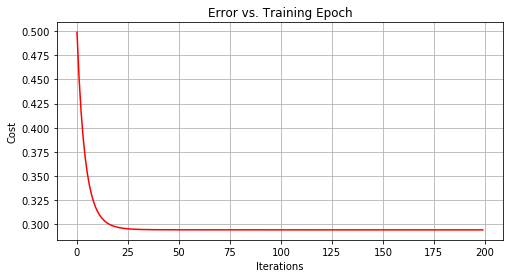

In [1020]:
plot_cost_error(iters, cost)
plt.savefig('16_groupon_error.png')

In [1021]:
X, y = prepare_to_evaluate(test_data)
f = X * g.transpose()
f

matrix([[-0.39382197],
        [-0.20739962],
        [-0.24611764],
        ..., 
        [-0.29118217],
        [-0.18123579],
        [-0.01673864]])

In [1022]:
fig, ax = plt.subplots(figsize=(8,4))
y = desnormalize(y, mu['num_sold'], sigma['num_sold'])
f = desnormalize(f, mu['num_sold'], sigma['num_sold'])
y = np.squeeze(np.asarray(y))
f = np.squeeze(np.asarray(f))
ax.scatter(y, f, label='Sold') 
plt.xlabel('Number of solds')
plt.ylabel('Predicted')
plt.title('Real vs Prediction')
fig.savefig('17_groupon_scatter.png')


In [1023]:
#t = test_data["discount_pct"]
#d = test_data["duration"]
#f = test_data["featured"]
#l = test_data["limited_quantity"]
#w = {x: test_data[x] for x in weekday}
#c = [test_data[x] for x in city]
#g = [test_data[x] for x in categories]

In [1024]:
#q = g[0, 0] + (g[0, 1] * np.log(q)) + (g[0, 2] * log(t)) + (g[0, 3] * log(d)) + (g[0, 4] * f) + (g[0, 5] * l) + (g[0, 6] * w) + (g[0, 7] * c) + (g[0, 8] * g)